## Final Project/Exam
### INFO4604
### Jesus Carnero - JECA4392


In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() 

In [2]:
import random
import glob
import matplotlib.image as mpimg # for loading in images
%matplotlib inline
!pip install opencv-python

import cv2 # helper functions


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 22.7 MB/s eta 0:00:0000:0100:01


## EDA and Proprocessing

In [3]:
#Standardize images to be same size
def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 3
    col_crop = 3
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image_crop, (32, 32))
    return standard_im



# Read all training images

# Green Training
training_list_green = []
for file in glob.glob("traffic_light_images/training/green/*"):
    
    im = mpimg.imread(file)
    # Append the standardized image to the green image list
    training_list_green.append(standardize_input(im))

    
# Yellow Training
training_list_yellow = []
for file in glob.glob("traffic_light_images/training/yellow/*"):
    
    im = mpimg.imread(file)
    # Append the standardized image to the yellow image list
    training_list_yellow.append(standardize_input(im))

    
# Red Training
training_list_red = []
for file in glob.glob("traffic_light_images/training/red/*"):
    
    im = mpimg.imread(file)
    # Append the standardized image to the red image list
    training_list_red.append(standardize_input(im))


(32, 32, 3)


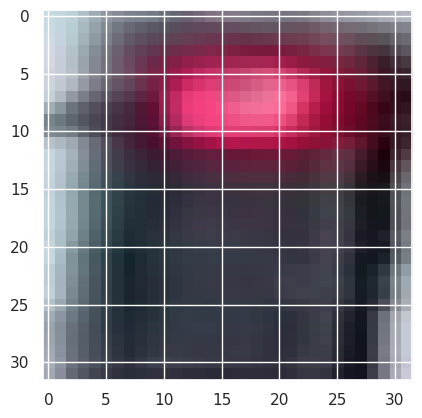

In [4]:
# Check images are resized correcly as we want them to all be the same dimensions
print(training_list_red[0].shape)
plt.imshow(training_list_green[0])
plt.imshow(training_list_red[0])
#plt.imshow(training_list_yellow[0])

In [5]:
## Make labels by assigning making dummy variables for categorial data
labels_green = np.zeros(len(training_list_green))
labels_yellow = np.ones(len(training_list_yellow))
labels_red = 2 * np.ones(len(training_list_red))

In [6]:
# Concatenate data and labels
X_train = np.concatenate([training_list_green, training_list_yellow, training_list_red])
y_train = np.concatenate([labels_green, labels_yellow, labels_red])

In [7]:
from sklearn.utils import shuffle
# Shuffle the data
X_train, y_train = shuffle(X_train, y_train, random_state=5)

In [8]:
# Devide the rgb values by 255 to standardize
X_train = X_train / 255.0

## Tensorflow model with CNN

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Begin model
model = Sequential()
# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and relu activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# Add a densely connected layer with 128 neurons and relu activation
model.add(Dense(128, activation='relu'))
# Add the output layer for 3 classes and softmax activation
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Make tensor from array
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64)

## Fit Model
training_history = model.fit(X_train_tensor, y_train_tensor, epochs=10, validation_split=0.2)

2024-04-02 23:06:55.209583: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 23:06:55.215864: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 23:06:55.284857: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 23:06:55.286793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 23:06:56.461924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/10
30/30 [==============================] - 2s 34ms/step - loss: 0.3814 - accuracy: 0.8714 - val_loss: 0.0521 - val_accuracy: 0.9874
Epoch 2/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0730 - accuracy: 0.9831 - val_loss: 0.0429 - val_accuracy: 0.9916
Epoch 3/10
30/30 [==============================] - 1s 28ms/step - loss: 0.0407 - accuracy: 0.9905 - val_loss: 0.0177 - val_accuracy: 0.9958
Epoch 4/10
30/30 [==============================] - 1s 29ms/step - loss: 0.0303 - accuracy: 0.9926 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 1s 26ms/step - loss: 0.0199 - accuracy: 0.9958 - val_loss: 0.0244 - val_accuracy: 0.9958
Epoch 6/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0177 - accuracy: 0.9958 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7/10
30/30 [==============================] - 1s 27ms/step - loss: 0.0090 - accuracy: 0.9968 - val_loss: 0.0121 - val_accuracy: 0.9958
Epoch 8/10
30

In [10]:
## Prepare test

In [11]:
# Read all test images

# Green Test
test_list_green = []
for file in glob.glob("traffic_light_images/test/green/*"):
    
    im = mpimg.imread(file)
    # Append the standardized image to the green image list
    test_list_green.append(standardize_input(im))

    
# Yellow test
test_list_yellow = []
for file in glob.glob("traffic_light_images/test/yellow/*"):
    
    im = mpimg.imread(file)
    # Append the standardized image to the yellow image list
    test_list_yellow.append(standardize_input(im))

    
# Red test
test_list_red = []
for file in glob.glob("traffic_light_images/test/red/*"):
    
    im = mpimg.imread(file)
    # Append the standardized image to the red image list
    test_list_red.append(standardize_input(im))


181


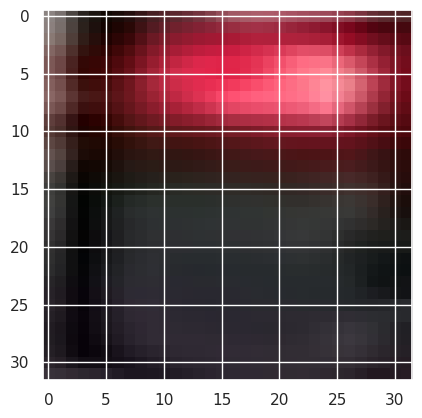

In [12]:
# Check images
print(len(test_list_red))
plt.imshow(test_list_green[0])
plt.imshow(test_list_red[0])
#plt.imshow(test_list_yellow[0])

In [13]:
## Make labels by assigning making dummy variables for categorial data
test_labels_green = np.zeros(len(test_list_green))
test_labels_yellow = np.ones(len(test_list_yellow))
test_labels_red = 2 * np.ones(len(test_list_red))

In [14]:
# Concatenate data and labels to later test in model
X_test = np.concatenate([test_list_green, test_list_yellow, test_list_red])
y_test = np.concatenate([test_labels_green, test_labels_yellow, test_labels_red])

In [15]:
# Shuffle the data
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [16]:
# Devide the rgb values by 255 to standardize
X_test = X_test / 255.0

In [17]:
# Evaluate performance with test images
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 1.0000


[0.00652988301590085, 1.0]

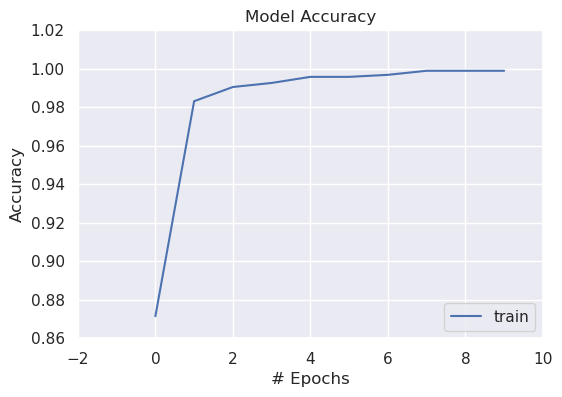

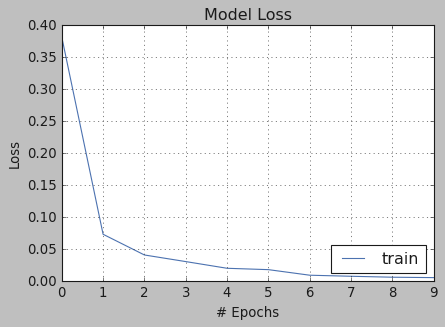

In [18]:
epoch = len(training_history.history.get('loss',[]))

# Draw Model Accuracy
plt.figure(2,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('accuracy'))
#plt.plot(range(epoch),training_history.history.get('val_acc'))
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
plt.style.use(['classic'])

# Draw Model Loss
plt.figure(1,figsize=(6,4))
plt.plot(range(epoch),training_history.history.get('loss'))
#plt.plot(range(epoch),training_history.history.get('val_loss'))
plt.xlabel('# Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.grid(True)
plt.legend(['train','validation'], loc=4)
plt.style.use(['classic'])

In [19]:
X_test_red_tensor = tf.convert_to_tensor(test_list_red, dtype=tf.float32)

# Make predictions
predictions = model.predict(X_test_red_tensor)
## Check all images were in prediction
print(len(predictions))

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Evaluate accuracy
accuracy = np.sum(predicted_labels == 2) / len(predicted_labels)
print(f"Accuracy on red lights: ", accuracy)

6/6 [==============================] - 0s 4ms/step
181
Accuracy on red lights:  1.0


## Conclusions

#### The model has an accuracy of score of 1 after the 7th epoch, the loss was also brought down to < .001 by the 10th epoch. The model has classified all of the red lights correctly.



# Model 2 - KNN model

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [21]:
## Most of the preprocessing has been done in the previous model. All we need to do is to join the images again
## and flatten them so they can be inputted into the knn model.

## Join image lists
X_train = np.concatenate([training_list_green, training_list_yellow, training_list_red])
y_train = np.concatenate([labels_green, labels_yellow, labels_red])

X_test = np.concatenate([test_list_green, test_list_yellow, test_list_red])
y_test = np.concatenate([test_labels_green, test_labels_yellow, test_labels_red])

## Flatten image arrays so knn model can use them.
X_train_flat = np.array([image.flatten() for image in X_train])
X_test_flat = np.array([image.flatten() for image in X_test])

## Check shape of array
print(X_train_flat.shape)

## Build model
knn_model = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

# Train the model
knn_model.fit(X_train_flat, y_train)

## Make predictions
y_pred = knn_model.predict(X_test_flat)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: ", accuracy)


(1187, 3072)
Accuracy on the test set:  0.9865319865319865


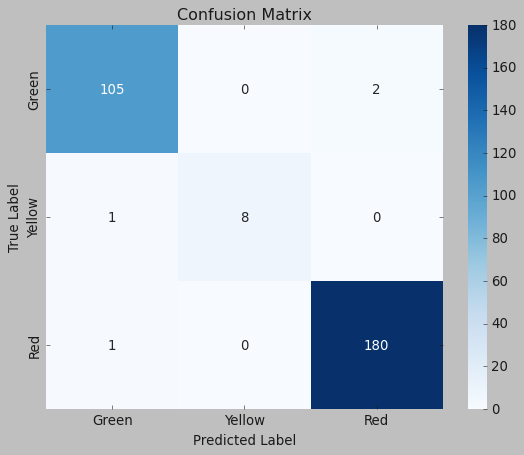

In [22]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Green', 'Yellow', 'Red'], yticklabels=['Green', 'Yellow', 'Red'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion
#### Our KNN model has an accuracy of .9862 misclassifying only 4 of the images tested. Sadly I did not manage to classify correctly all red lights and one of them was classified as green.